In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from pandas.tseries.offsets import DateOffset
import geopandas as gpd
from shapely.geometry import Polygon


## National Results

In [4]:

national_results = pd.read_csv('data_tables/national_results.csv')

#Convert release period to datetime
national_results['Release Period'] = pd.to_datetime(national_results['Release Period'].str.lstrip('07_'))
national_results.columns = national_results.columns.str.lower().str.replace(' ', '_')
national_results['nps'] = national_results['top-box_percentage'] - national_results['bottom-box_percentage']

national_results

,release_period,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,nps
0,2015-01-01,H_CLEAN_HSP,8,18,74,66
1,2015-01-01,H_COMP_1,4,17,79,75
2,2015-01-01,H_COMP_2,4,14,82,78
3,2015-01-01,H_COMP_3,9,23,68,59
4,2015-01-01,H_COMP_5,18,17,65,47
...,...,...,...,...,...,...
85,2023-01-01,H_COMP_6,14,0,86,72
86,2023-01-01,H_COMP_7,6,43,51,45
87,2023-01-01,H_HSP_RATING,9,21,70,61
88,2023-01-01,H_QUIET_HSP,10,28,62,52


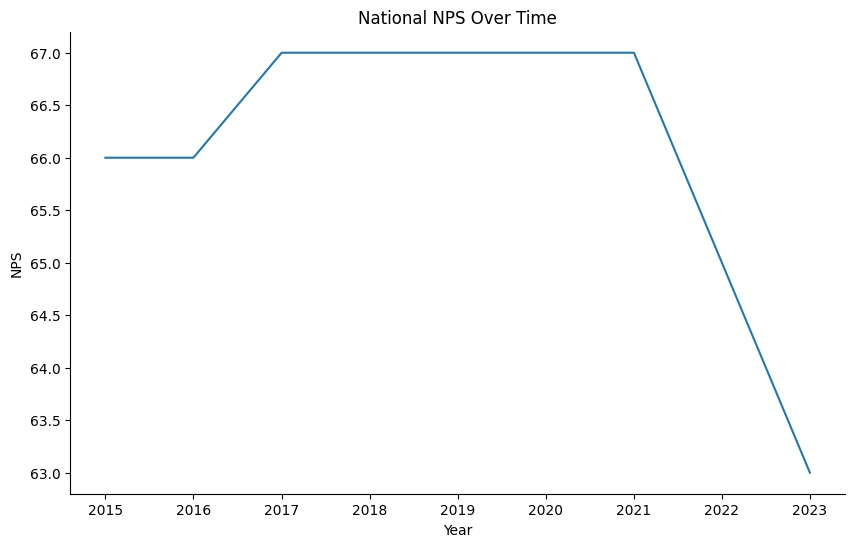

In [6]:
# National NPS over time
national_nps = national_results[national_results['measure_id'] == 'H_RECMND']
plt.figure(figsize=(10, 6))
ax = sns.lineplot(national_nps, x='release_period', y='nps')
plt.title('National NPS Over Time')
plt.xlabel('Year')
plt.ylabel('NPS')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

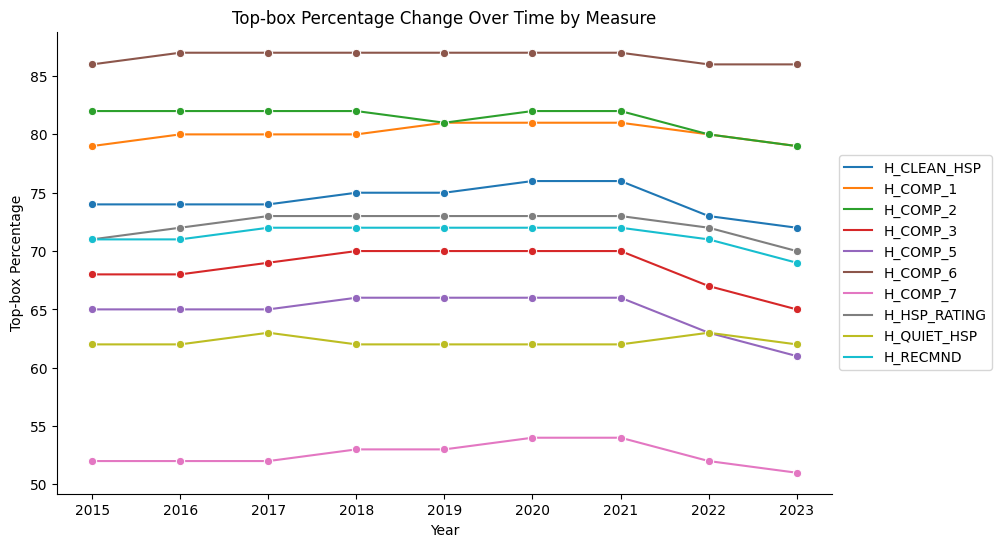

In [7]:
# Top-box percentage change over time by measure
plt.figure(figsize=(10, 6))
ax = sns.lineplot(national_results, x='release_period', y='top-box_percentage', hue='measure_id', marker='o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Top-box Percentage Change Over Time by Measure')
plt.xlabel('Year')
plt.ylabel('Top-box Percentage')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<Figure size 1000x600 with 0 Axes>

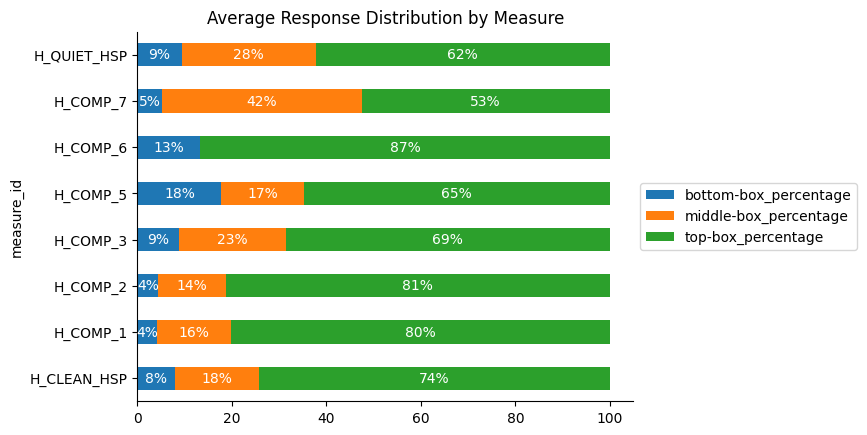

In [9]:

average_national_results = national_results.drop(columns=['release_period', 'nps']).groupby('measure_id').mean().reset_index()
average_national_results = average_national_results[~average_national_results['measure_id'].isin(['H_RECMND', 'H_HSP_RATING'])]
average_national_results

# Average response distribution by measure
plt.figure(figsize=(10, 6))
ax = average_national_results.plot(kind='barh', x='measure_id', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Response Distribution by Measure')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Annotate the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # To avoid annotating bars with 0 width
        ax.text(width/2 + p.get_x(), 
                p.get_y() + p.get_height()/2, 
                '{:.0f}%'.format(width), 
                ha='center', 
                va='center', 
                color='white')

plt.show()